In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
hr = pd.read_csv("C:/Users/Anonymous/Desktop/Advance Statistics/human-resources-analytics/HR_comma_sep.csv")
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,support,low
14991,0.37,0.48,2,160,3,0,1,0,support,low
14992,0.37,0.53,2,143,3,0,1,0,support,low
14993,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
dum_hr = pd.get_dummies(hr,drop_first=True)

In [4]:
X = dum_hr.drop('left',axis=1)

In [5]:
y = dum_hr['left']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=3,random_state=23)
dtc = DecisionTreeClassifier(max_depth = 3 ,random_state=23)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=23)

Best Depth =  2
Best Error Score =  1.0


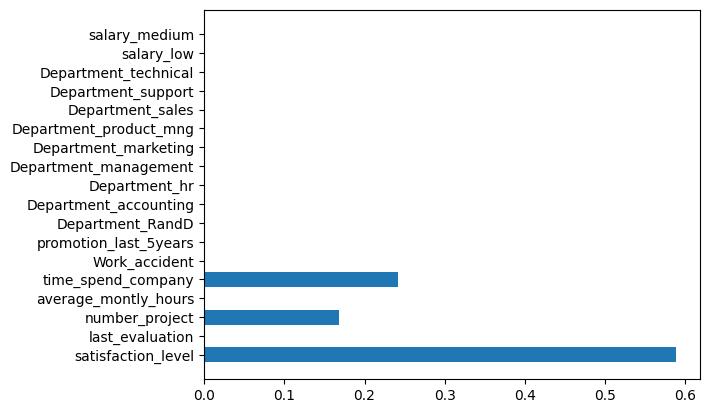

In [7]:
acc = []
depth_values = [1,2,3,4,5,6,7,8,9,10]
for depth in depth_values:
    dtr = DecisionTreeClassifier(max_depth = depth,random_state = 23)
    dtr.fit(X_train,y_train)
    ycap = dtr.predict(X_test)
    acc.append(accuracy_score(y_test,ycap))


    
i_max = np.argmax(acc)
print("Best Depth = ",depth_values[i_max])
print("Best Error Score = ",np.max(acc))

dtc=DecisionTreeClassifier(max_depth=depth_values[i_max],random_state=23)
dtc.fit(X_train,y_train)
importances=dtc.feature_importances_
plt.barh(X_train.columns,importances)
plt.show()

In [8]:
######################### Naive baye's ######################################
from sklearn.naive_bayes import BernoulliNB



In [9]:
telecom = pd.read_csv("C:/Users/Anonymous/Desktop/Advance Statistics/Datasets/Telecom.csv")
telecom

,Gender,TT_gt_100,Response
0,F,Y,N
1,M,N,N
2,M,N,N
3,F,Y,Y
4,F,N,N
...,...,...,...
145,F,Y,Y
146,M,N,Y
147,M,N,N
148,M,N,N


In [10]:
dum_tel = pd.get_dummies(telecom,drop_first=True)
dum_tel

,Gender_M,TT_gt_100_Y,Response_Y
0,False,True,False
1,True,False,False
2,True,False,False
3,False,True,True
4,False,False,False
...,...,...,...
145,False,True,True
146,True,False,True
147,True,False,False
148,True,False,False


In [11]:
dum_tel = dum_tel.astype(int)

In [12]:
X = dum_tel.drop('Response_Y',axis = 1)
y = dum_tel['Response_Y']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23)
nb = BernoulliNB()

In [14]:
nb.fit(X_train,y_train)

BernoulliNB()

In [15]:
y_pred = nb.predict(X_test)

In [16]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[18  1]
 [ 4 22]]
0.8888888888888888


In [17]:

######################### Cancer Patients ####################
cancer = pd.read_csv("C:/Users/Anonymous/Desktop/Advance Statistics/Cancer/Cancer.csv")
cancer

,subjid,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,1,40-49,premeno,15-19,0-2,yes,three,right,left_up,no,recurrence-events
1,2,50-59,ge40,15-19,0-2,no,one,right,central,no,no-recurrence-events
2,3,50-59,ge40,35-39,0-2,no,two,left,left_low,no,recurrence-events
3,4,40-49,premeno,35-39,0-2,yes,three,right,left_low,yes,no-recurrence-events
4,5,40-49,premeno,30-34,5-Mar,yes,two,left,right_up,no,recurrence-events
...,...,...,...,...,...,...,...,...,...,...,...
281,282,50-59,ge40,30-34,8-Jun,yes,two,left,left_low,no,no-recurrence-events
282,283,50-59,premeno,25-29,5-Mar,yes,two,left,left_low,yes,no-recurrence-events
283,284,30-39,premeno,30-34,8-Jun,yes,two,right,right_up,no,no-recurrence-events
284,285,50-59,premeno,15-19,0-2,no,two,right,left_low,no,no-recurrence-events


In [18]:
dum_cancer = pd.get_dummies(cancer,drop_first=True)
dum_cancer

,subjid,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_14-Oct,tumor-size_15-19,...,node-caps_yes,deg-malig_three,deg-malig_two,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes,Class_recurrence-events
0,1,False,True,False,False,False,False,True,False,True,...,True,True,False,True,False,True,False,False,False,True
1,2,False,False,True,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,3,False,False,True,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
3,4,False,True,False,False,False,False,True,False,False,...,True,True,False,True,True,False,False,False,True,False
4,5,False,True,False,False,False,False,True,False,False,...,True,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,282,False,False,True,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False
282,283,False,False,True,False,False,False,True,False,False,...,True,False,True,False,True,False,False,False,True,False
283,284,True,False,False,False,False,False,True,False,False,...,True,False,True,True,False,False,False,True,False,False
284,285,False,False,True,False,False,False,True,False,True,...,False,False,True,True,True,False,False,False,False,False


In [42]:
dum_cancer = dum_cancer.astype(int)
X = dum_cancer.drop('Class_recurrence-events',axis = 1)
y = dum_cancer['Class_recurrence-events']
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=23)
nb = BernoulliNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[49 11]
 [14 12]]
0.7093023255813954


In [44]:
print(accuracy_score(y_test,y_pred))

0.7093023255813954


In [20]:
### with help of decision tree 
# calculate confusion_matrix and Accuracy_score 

acc = []
depth_values = [1,2,3,4,5,6,7,8,9,10]
for depth in depth_values:
    dtr = DecisionTreeClassifier(max_depth = depth,random_state = 23)
    dtr.fit(X_train,y_train)
    ycap = dtr.predict(X_test)
    acc.append(accuracy_score(y_test,ycap))


    
i_max = np.argmax(acc)
print("Best Depth = ",depth_values[i_max])
print("Best Error Score = ",np.max(acc))

Best Depth =  9
Best Error Score =  0.686046511627907


In [21]:
y_train.value_counts(normalize=True)*100

Class_recurrence-events
0    70.5
1    29.5
Name: proportion, dtype: float64

In [22]:
y_test.value_counts(normalize=True)*100

Class_recurrence-events
0    69.767442
1    30.232558
Name: proportion, dtype: float64

In [23]:
y_train.value_counts()

Class_recurrence-events
0    141
1     59
Name: count, dtype: int64

In [24]:
y_test.value_counts()

Class_recurrence-events
0    60
1    26
Name: count, dtype: int64

In [25]:
y.value_counts()

Class_recurrence-events
0    201
1     85
Name: count, dtype: int64

In [26]:
########################### Bankrupty ###############################

from sklearn.naive_bayes import GaussianNB

In [27]:
bankruptcy = pd.read_csv("C:/Users/Anonymous/Desktop/Advance Statistics/Bankruptcy/Bankruptcy.csv")
bankruptcy

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,1,77,0.27,0.03,0.07,0.10,0.09,0.18,0.26,...,0.11,0.06,0.12,0.17,7.56,2.07,1.45,0.06,0.13,0.19
128,129,1,77,0.32,0.03,0.03,0.09,0.05,0.06,0.16,...,0.17,0.07,0.09,0.26,5.99,1.27,2.74,0.06,0.08,0.21
129,130,1,78,0.08,0.01,0.02,0.05,0.04,0.07,0.15,...,0.19,0.07,0.12,0.26,7.14,1.89,2.10,0.07,0.12,0.26
130,131,1,78,0.14,0.01,0.05,0.07,0.02,0.09,0.14,...,0.07,0.02,0.10,0.15,170.96,4.55,1.45,0.02,0.10,0.14


In [28]:
X = bankruptcy.drop(['NO','YR','D'],axis=1)
y =bankruptcy['D']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=23)

In [30]:
nb = GaussianNB()
# Apriori Probabilities calculation
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[19  1]
 [ 9 11]]
0.75


In [31]:
##################### Glass ############

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd


glass = pd.read_csv(r'C:\Users\Anonymous\Desktop\Advance Statistics\Glass Identification\Glass.csv')

In [33]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,headlamps


In [34]:
X = glass.drop('Type', axis=1)
y = glass['Type']
lbl = LabelEncoder()
y = lbl.fit_transform(y)
print(lbl.classes_)
print(dict(zip(lbl.classes_,np.unique(y))))

['building_windows_float_processed' 'building_windows_non_float_processed'
 'containers' 'headlamps' 'tableware' 'vehicle_windows_float_processed']
{'building_windows_float_processed': 0, 'building_windows_non_float_processed': 1, 'containers': 2, 'headlamps': 3, 'tableware': 4, 'vehicle_windows_float_processed': 5}


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,
                                                    test_size=0.3,
                                                    random_state=23)

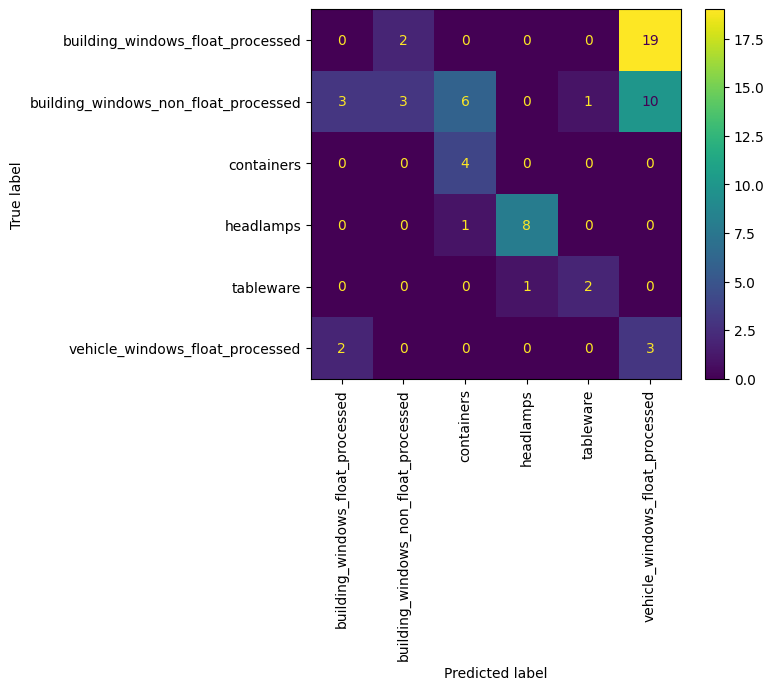

0.3076923076923077


In [36]:
nb = GaussianNB()
# Apriori Probabilities calculation
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lbl.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

print(accuracy_score(y_test, y_pred))

In [37]:
acc = []
depth_values = [1,2,3,4,5,6,7,8,9,10]
for depth in depth_values:
    dtc = DecisionTreeClassifier(max_depth=depth, 
                                random_state=23)
    dtc.fit(X_train, y_train)
    ycap = dtc.predict(X_test)
    acc.append(accuracy_score(y_test, ycap))

i_max = np.argmax(acc)
print("Best Depth =", depth_values[i_max])
print("Best Accuracy Score =", np.max(acc))

Best Depth = 6
Best Accuracy Score = 0.7846153846153846


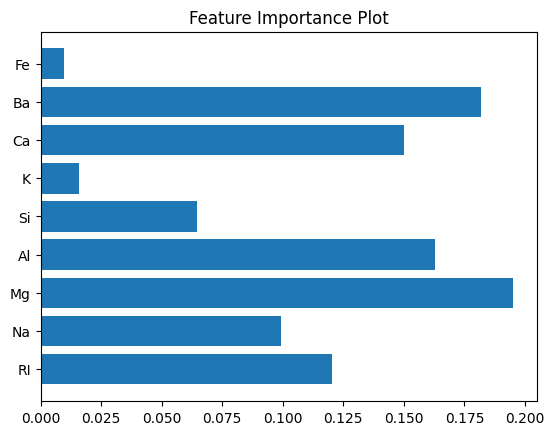

In [38]:
dtc = DecisionTreeClassifier(max_depth=depth_values[i_max], 
                                random_state=23)
dtc.fit(X_train, y_train)
importances = dtc.feature_importances_
plt.barh(X_train.columns, importances)
plt.title("Feature Importance Plot")
plt.show()

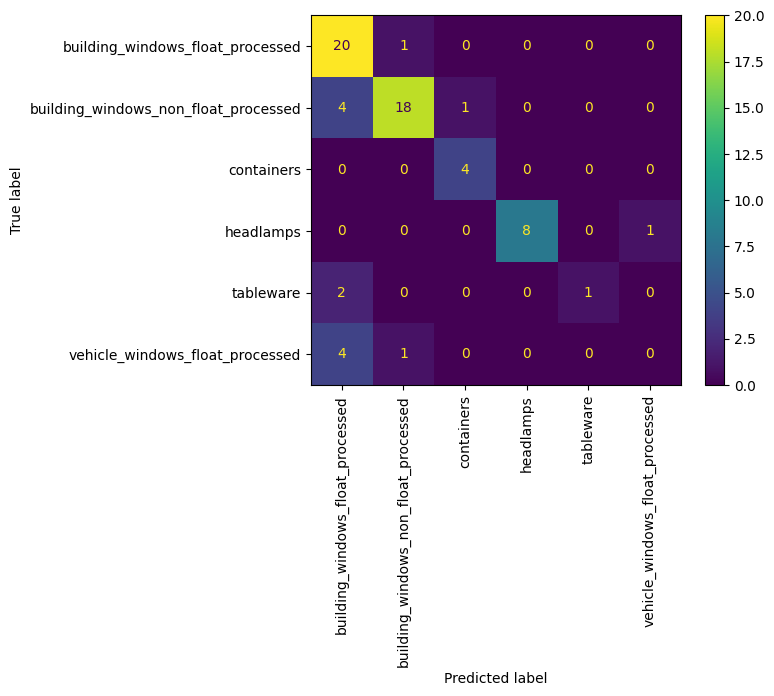

In [39]:
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lbl.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()